In [6]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
import cosmoplots

from scipy.stats import skew, kurtosis

from fppanalysis.running_moments import window_radius, run_norm_ds

from analysis_functions.constants import greenwald_fraction, shot_time_window
from analysis_functions.apd_functions import get_signal, get_time, get_rz, get_rz_full

In [2]:
# These are the rho shift, which means the shift of the separatrix position calculated by EFIT. 
# There are three numbers for each shot. This is because the MLP does three plunges, in other words, it does three full reciprocations. 
# Adam calculated this rho shift for each plunge, so that's where Ralph got these numbers from.

# Ralph's values
asp_rho_shift_dict = {
    1160616009: (2e-3, 4e-3, 6e-3),
    1160616011: (1e-3, 4e-3, 6e-3),
    1160616016: (2e-3, 4e-3, 6e-3),
    1160616022: (2e-3, 4e-3, 6e-3),
}

In [8]:
magnetic_connection_length = {
    1160616018: {
      0.89: 21.9,
      #0.8908: 16.1,
      0.891: 15.3,
      #0.8911: 15,
      0.892: 12.7,
      0.893: 11.1,
      0.894: 9.95,
      0.895: 9.18,
      0.896: 8.45,
      0.897: 7.94,
      0.898: 7.51, 
      0.899: 7.14,
      0.900: 6.81,
      0.901: 6.52,
      0.902: 6.27,
      0.903: 6.04,
      0.904: 5.83,
      0.905: 5.64,
      0.906: 5.47,
      0.907: 0.733,
      0.908: 0.665,
      0.909: 0.607,
      0.91: 0.121,
    },
    1110201016: {
      0.893: 11.5,
      0.894: 8.15, 
      0.895: 6.89,
      0.896: 6.08,
      0.897: 5.5,
      0.898: 5.06, 
      0.899: 4.74,
      0.900: 4.48,
      0.901: 4.26, 
      0.902: 4.06,
      0.903: 3.89,
      0.904: 3.73,
      0.905: 3.6, 
      0.906: 3.48, 
      0.907: 0.466,
      0.908: 0.414,
      0.909: 0.378,
      0.91: 0.062,
      0.911: 0.157, 
    },
    1110201011: {
      0.893: np.nan,
      0.894: np.nan, 
      0.895: 6.92,
      0.896: 5.67,
      0.897: 4.95,
      0.898: 4.44, 
      0.899: 4.06,
      0.900: 3.77,
      0.901: 3.55, 
      0.902: 3.37,
      0.903: 3.20,
      0.904: 3.06,
      0.905: 2.94, 
      0.906: 2.83, 
      0.907: 0.357,
      0.908: 0.324,
      0.909: 0.298,
      0.91: 0.0553,
      0.911: 0.129, 
    }
}

In [9]:
major_R_by_shot = {}
connection_length_by_shot = {}

# Iterate over each shot's data
for shot_number, values in magnetic_connection_length.items():
    # Assign the list of major_R keys to the corresponding shot number
    #major_R_to_cm = 
    major_R_by_shot[shot_number] = list(values.keys())
    connection_length_by_shot[shot_number] = list(values.values())

In [10]:
shotlist = [1110201016, 1110201011, 1160616018]
f_GWs = [greenwald_fraction[shot] for shot in shotlist]
marker_list = ['^', 's', 'o']
color_list = ['#785EF0', '#DC267F','#FFB000']
label_name = ['EDA H', 'ELM-free H', 'Ohmic']

Text(0.5, 0, '$R\\,/\\,\\mathrm{cm}$')

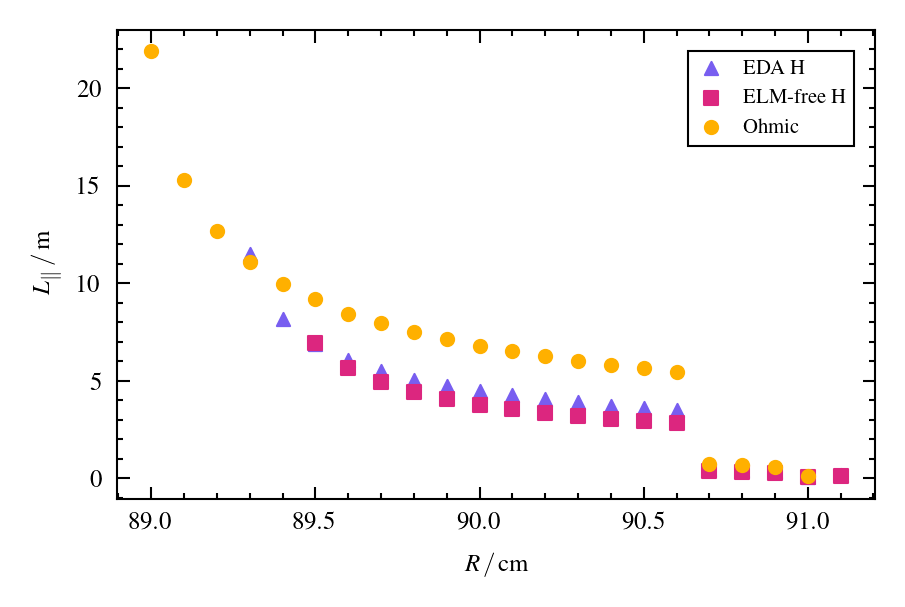

In [11]:
axes_size = cosmoplots.set_rcparams_dynamo(plt.rcParams, num_cols=1, ls="thin")
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["font.size"] = 6
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["axes.labelsize"] = 6
plt.rcParams["xtick.labelsize"] = 6
plt.rcParams["ytick.labelsize"] = 6
plt.rcParams["xtick.major.size"] = 3
plt.rcParams["xtick.minor.size"] = 1.5
plt.rcParams["ytick.major.size"] = 3
plt.rcParams["ytick.minor.size"] = 1.5
plt.rcParams["ytick.minor.width"] = 0.5
plt.rcParams["xtick.minor.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["xtick.major.width"] = 0.5

fig = plt.figure()
ax = fig.add_axes(axes_size)

for idx, shot in enumerate(shotlist):
  major_R_by_shot_to_cm = [item * 100 for item in major_R_by_shot[shot]]
  ax.scatter(major_R_by_shot_to_cm, connection_length_by_shot[shot], color=color_list[idx], marker=marker_list[idx], s=10, label=label_name[idx])
ax.legend(borderaxespad=1)
ax.set_ylabel(r'$L_{\parallel}\,/\, \mathrm{m}$')
ax.set_xlabel(r'$R\,/\,\mathrm{cm}$')